In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
# Parse the data
data=pd.read_csv("~/Documents/Housing.csv")
y_train=data['price']
cols=list(data.columns)[1:]
X_train=data.drop('price',axis=1)
X_train=X_train.replace('yes',1)
X_train=X_train.replace("no",0)
X_train=pd.get_dummies(X_train, columns = ['furnishingstatus'])

In [92]:
# Z-score standardize X_train
#X_norm=(X_train-np.mean(X_train))/np.std(X_train)
X_norm=StandardScaler(with_std=True,with_mean=True).fit_transform(X_train,y_train)

/home/ajdj/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [93]:
# Fit the model and predict
reg=LinearRegression()
reg.fit(X_norm,y_train)
y_pred=reg.predict(X_norm)

In [94]:
# Print MSE and Mean abs err
print(mean_squared_error(y_train,y_pred))
print(mean_absolute_error(y_train,y_pred))

1111187722284.4004
775054.3287400276


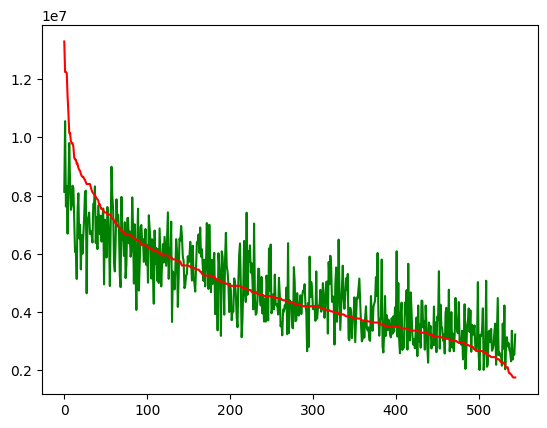

In [95]:
# Plot the preds vs y_train
plt.plot(y_pred,color='g')
plt.plot(y_train,color='r')